In [2]:
import pandas as pd
import re
import string
from arabic_reshaper import arabic_reshaper
from bidi.algorithm import get_display
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
stopwords = nltk. corpus.stopwords.words('arabic')
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
import numpy as np
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
nltk.download('wordnet')
pd.set_option('display.max_colwidth',100)
ps = nltk.ISRIStemmer()
wn = nltk.WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/arwaalgethami/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:

Lyrics_df = pd.read_csv('arabicLyrics.csv')

In [4]:
Lyrics_df

,songID,Singer,SongTitle,SongWriter,Composer,LyricsOrder,Lyrics,SingerNationality,SongDialect
0,1537,ابتسام,اروح لاحبابي,ملامح,بندر بن فهد,2,اروح لاحبابي والاقي الفرح ساكن عينهم,Morocco,Meghribi
1,1537,ابتسام,اروح لاحبابي,ملامح,بندر بن فهد,3,ابتسم لافراحهم وانا من الهم احترق,Morocco,Meghribi
2,1537,ابتسام,اروح لاحبابي,ملامح,بندر بن فهد,4,واسأل جروحي من ترى حس بعذابي منهم,Morocco,Meghribi
3,1537,ابتسام,اروح لاحبابي,ملامح,بندر بن فهد,5,وبالحقيقه انصدم محدن معه همي فرق,Morocco,Meghribi
4,1537,ابتسام,اروح لاحبابي,ملامح,بندر بن فهد,6,دورت في كل الوجيه حسيت غربه بينهم,Morocco,Meghribi
...,...,...,...,...,...,...,...,...,...
527891,1093,يونس الخطيب,احن الهم دويتو ادريس ويونس الخطيب,عبد الله العبد الله,يونس الخطيب,37,مالي وياهم ذنب,Iraq,Iraqi
527892,1093,يونس الخطيب,احن الهم دويتو ادريس ويونس الخطيب,عبد الله العبد الله,يونس الخطيب,38,حرقت الروح لمن فارقتهم,Iraq,Iraqi
527893,1093,يونس الخطيب,احن الهم دويتو ادريس ويونس الخطيب,عبد الله العبد الله,يونس الخطيب,39,بجيت ومن دموعي غرقتهم,Iraq,Iraqi
527894,1093,يونس الخطيب,احن الهم دويتو ادريس ويونس الخطيب,عبد الله العبد الله,يونس الخطيب,40,ايش قال القلب لمن ودعتهم,Iraq,Iraqi


In [5]:
def clean_Lyrics(Lyrics):
    Lyrics = "".join([word.lower() for word in Lyrics if word not in string.punctuation])
    punctuation = ['،؛؟”0123456789“']  
    Lyrics = "".join([word.lower() for word in Lyrics if word not in punctuation])
    tokens = re.split('\W+', Lyrics)
    Lyrics = [word for word in tokens if word not in stopwords]
    regex = re.compile('[^ا-ي]')
    Lyrics = [regex.sub('', word) for word in Lyrics]
    Lyrics = [word for word in Lyrics if len(word) > 0]
    ignore = ['وانت','ربي','انه','الي','كله','كان','منك','ني','انت',
              'وين','اذا','او','عنك','منك','ونا','من','ماهو','فوق','كنت','وفي',
              'الا','وسط','فيك','انك','صار','مني','قبل','مو','ربي','شي','ما','اللي', 'للي', 'بلا'
              'وش','وكل','على','يالي','ماني','فيك','انتي','والله','مثل',]
    Lyrics = [word for word in Lyrics if word not in ignore]
    return Lyrics

Lyrics_df['Clean_Lyrics'] = Lyrics_df['Lyrics']. apply(lambda x: clean_Lyrics(x.lower())) 
Lyrics_df['SongDialect'] = Lyrics_df['SongDialect']. apply(lambda x: x.lower())
Lyrics_df['SingerNationality'] = Lyrics_df['SingerNationality']. apply(lambda x: x.lower())
                                                                 
Lyrics_df.head()

,songID,Singer,SongTitle,SongWriter,Composer,LyricsOrder,Lyrics,SingerNationality,SongDialect,Clean_Lyrics
0,1537,ابتسام,اروح لاحبابي,ملامح,بندر بن فهد,2,اروح لاحبابي والاقي الفرح ساكن عينهم,morocco,meghribi,"[اروح, لاحبابي, والاقي, الفرح, ساكن, عينهم]"
1,1537,ابتسام,اروح لاحبابي,ملامح,بندر بن فهد,3,ابتسم لافراحهم وانا من الهم احترق,morocco,meghribi,"[ابتسم, لافراحهم, وانا, الهم, احترق]"
2,1537,ابتسام,اروح لاحبابي,ملامح,بندر بن فهد,4,واسأل جروحي من ترى حس بعذابي منهم,morocco,meghribi,"[واسل, جروحي, ترى, حس, بعذابي, منهم]"
3,1537,ابتسام,اروح لاحبابي,ملامح,بندر بن فهد,5,وبالحقيقه انصدم محدن معه همي فرق,morocco,meghribi,"[وبالحقيقه, انصدم, محدن, معه, همي, فرق]"
4,1537,ابتسام,اروح لاحبابي,ملامح,بندر بن فهد,6,دورت في كل الوجيه حسيت غربه بينهم,morocco,meghribi,"[دورت, الوجيه, حسيت, غربه, بينهم]"


In [7]:
# NLTK Lemmatization

In [6]:
def lemmatizing(Clean_Lyrics):
    text = " ".join([wn.lemmatize(word) for word in Clean_Lyrics])
    return text
Lyrics_df['Lyrics_lemmatized'] = Lyrics_df['Clean_Lyrics']. apply(lambda x: lemmatizing(x))
             
Lyrics_df.head(10)

,songID,Singer,SongTitle,SongWriter,Composer,LyricsOrder,Lyrics,SingerNationality,SongDialect,Clean_Lyrics,Lyrics_lemmatized
0,1537,ابتسام,اروح لاحبابي,ملامح,بندر بن فهد,2,اروح لاحبابي والاقي الفرح ساكن عينهم,morocco,meghribi,"[اروح, لاحبابي, والاقي, الفرح, ساكن, عينهم]",اروح لاحبابي والاقي الفرح ساكن عينهم
1,1537,ابتسام,اروح لاحبابي,ملامح,بندر بن فهد,3,ابتسم لافراحهم وانا من الهم احترق,morocco,meghribi,"[ابتسم, لافراحهم, وانا, الهم, احترق]",ابتسم لافراحهم وانا الهم احترق
2,1537,ابتسام,اروح لاحبابي,ملامح,بندر بن فهد,4,واسأل جروحي من ترى حس بعذابي منهم,morocco,meghribi,"[واسل, جروحي, ترى, حس, بعذابي, منهم]",واسل جروحي ترى حس بعذابي منهم
3,1537,ابتسام,اروح لاحبابي,ملامح,بندر بن فهد,5,وبالحقيقه انصدم محدن معه همي فرق,morocco,meghribi,"[وبالحقيقه, انصدم, محدن, معه, همي, فرق]",وبالحقيقه انصدم محدن معه همي فرق
4,1537,ابتسام,اروح لاحبابي,ملامح,بندر بن فهد,6,دورت في كل الوجيه حسيت غربه بينهم,morocco,meghribi,"[دورت, الوجيه, حسيت, غربه, بينهم]",دورت الوجيه حسيت غربه بينهم
5,1537,ابتسام,اروح لاحبابي,ملامح,بندر بن فهد,7,مع الأسف محدن ابد حس بعذاباتي ورق,morocco,meghribi,"[السف, محدن, ابد, حس, بعذاباتي, ورق]",السف محدن ابد حس بعذاباتي ورق
6,1537,ابتسام,اروح لاحبابي,ملامح,بندر بن فهد,8,جيت اتعثر بالتعب ابي اشوف يدينهم,morocco,meghribi,"[جيت, اتعثر, بالتعب, ابي, اشوف, يدينهم]",جيت اتعثر بالتعب ابي اشوف يدينهم
7,1537,ابتسام,اروح لاحبابي,ملامح,بندر بن فهد,9,ماكنت ابي الا احد يحس بي لو مانطق,morocco,meghribi,"[ماكنت, ابي, احد, يحس, مانطق]",ماكنت ابي احد يحس مانطق
8,1537,ابتسام,اروح لاحبابي,ملامح,بندر بن فهد,10,وحز فيني اني رجعت لكن رجعت بدونهم,morocco,meghribi,"[وحز, فيني, اني, رجعت, رجعت, بدونهم]",وحز فيني اني رجعت رجعت بدونهم
9,1537,ابتسام,اروح لاحبابي,ملامح,بندر بن فهد,11,يحز في نفسي بأنه ماسوى جرحي صدق,morocco,meghribi,"[يحز, نفسي, بنه, ماسوى, جرحي, صدق]",يحز نفسي بنه ماسوى جرحي صدق


In [8]:
# Vectorizing raw data

In [9]:
count_vect = CountVectorizer()

In [10]:
gulf_vocab = count_vect.fit_transform(Lyrics_df[Lyrics_df['SongDialect']=='gulf']['Lyrics_lemmatized'])
gulfvocab = pd.DataFrame(count_vect.vocabulary_.items(), columns=['word','count']).sort_values(by='count', ascending = False)
gulfvocab

,word,count
16985,ييوفيكي,111377
74148,ييني,111376
62293,ييش,111375
42952,ييسهر,111374
77220,ييسراك,111373
...,...,...
75947,اااوووبه,4
8627,اااه,3
41458,ااااه,2
2993,اااااه,1


There are 32 words in the combination of all review.


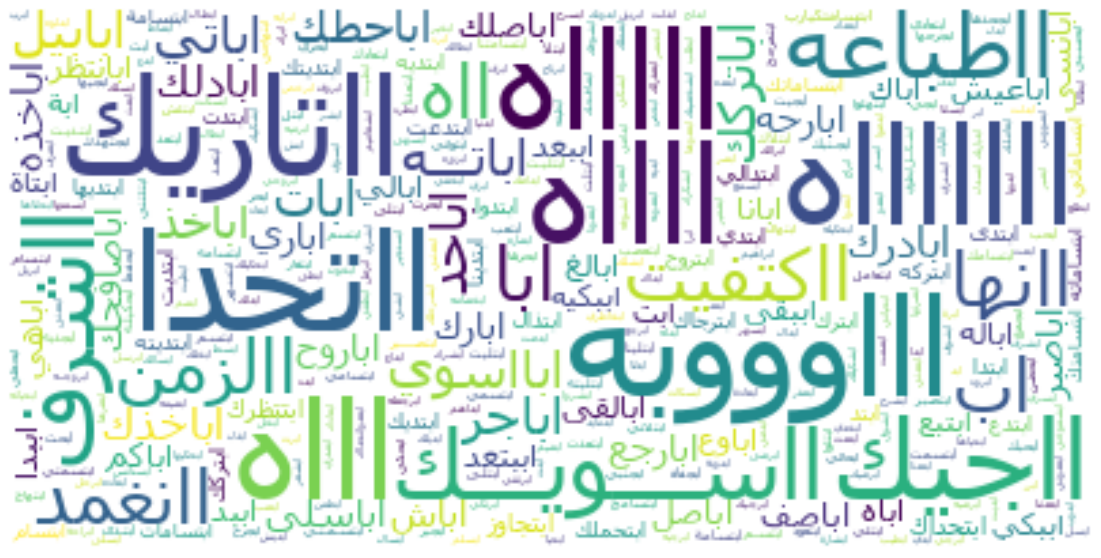

In [11]:
texts = ' '.join(word for word in gulfvocab['word'])
texts = ''.join(texts)
print ("There are {} words in the combination of all review.".format(len(set(texts))))

reshaped_text = arabic_reshaper.reshape(texts)
bidi_text = get_display(reshaped_text)

# Generate a word cloud image
wc = WordCloud(max_font_size=50, max_words=1000, stopwords=stopwords ,background_color="white",
               font_path="Tahoma Regular font.ttf")
wc.generate(bidi_text)
#Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

wc.to_file('gulfvocab.png')

In [43]:
count_vect = CountVectorizer()

In [44]:
iraqi_vocab = count_vect.fit_transform(Lyrics_df[Lyrics_df['SongDialect']=='iraqi']['Lyrics_lemmatized'])
iraqivocab = pd.DataFrame(count_vect.vocabulary_.items(), columns=['word','count']).sort_values(by='count', ascending = False)
iraqivocab

,word,count
19889,يييييي,59092
53596,ييييي,59091
10958,يييوم,59090
29942,يييديك,59089
58234,يييامهـ,59088
...,...,...
43349,اااااااااااااااااااه,4
40685,ااااااااااااااااااااااااااااااااه,3
51807,ااااااااااااااااااااااااااااااااااااااااااااااااا,2
51808,ااااااااا,1


There are 32 words in the combination of all review.


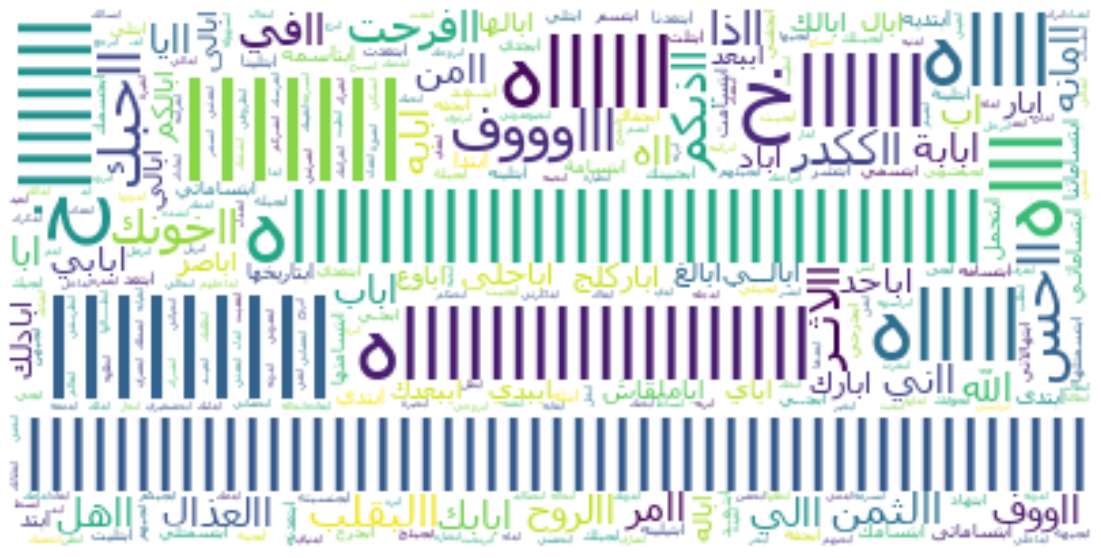

In [45]:
texts = ' '.join(word for word in iraqivocab['word'])
texts = ''.join(texts)
print ("There are {} words in the combination of all review.".format(len(set(texts))))

reshaped_text = arabic_reshaper.reshape(texts)
bidi_text = get_display(reshaped_text)

# Generate a word cloud image
wc = WordCloud(max_font_size=50, max_words=1000, stopwords=stopwords ,background_color="white",
               font_path="Tahoma Regular font.ttf")
wc.generate(bidi_text)
#Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

wc.to_file('iraqivocab.png')

In [47]:
count_vect = CountVectorizer()

In [48]:
meghribi_vocab = count_vect.fit_transform(Lyrics_df[Lyrics_df['SongDialect']=='meghribi']['Lyrics_lemmatized'])
meghribivocab = pd.DataFrame(count_vect.vocabulary_.items(), columns=['word','count']).sort_values(by='count', ascending = False)
meghribivocab

,word,count
7916,ييجي,23253
7928,ييجى,23252
21590,ييجوا,23251
5045,يي,23250
22356,يويلي,23249
...,...,...
22857,اادي,4
5298,اااه,3
16681,اااااه,2
8990,اااااااه,1


There are 32 words in the combination of all review.


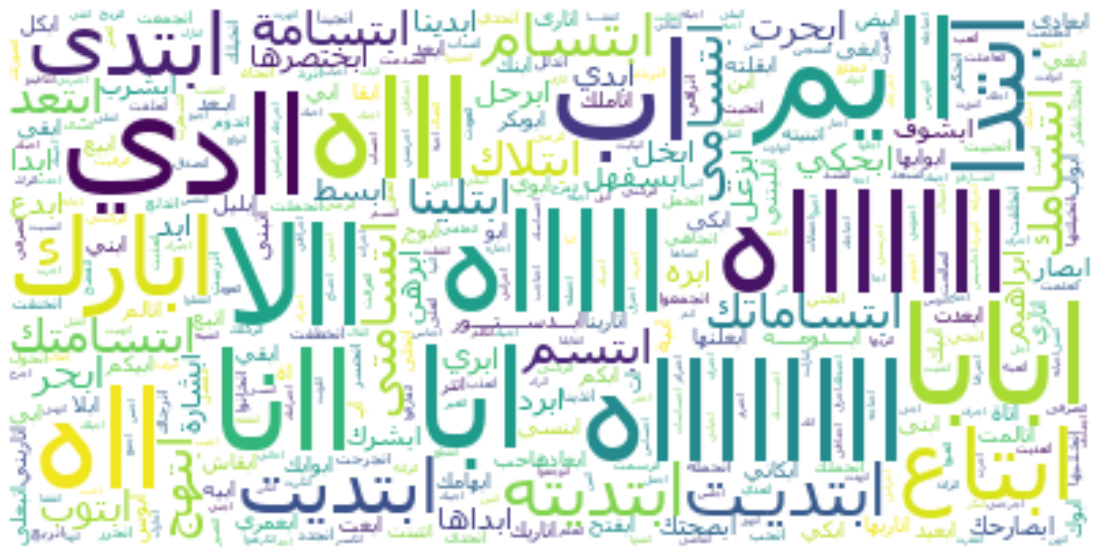

In [49]:
texts = ' '.join(word for word in meghribivocab['word'])
texts = ''.join(texts)
print ("There are {} words in the combination of all review.".format(len(set(texts))))

reshaped_text = arabic_reshaper.reshape(texts)
bidi_text = get_display(reshaped_text)

# Generate a word cloud image
wc = WordCloud(max_font_size=50, max_words=1000, stopwords=stopwords ,background_color="white",
               font_path="Tahoma Regular font.ttf")
wc.generate(bidi_text)
#Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

wc.to_file('meghribivocab.png')

In [ ]:
count_vect = CountVectorizer()

In [50]:
sudan_vocab = count_vect.fit_transform(Lyrics_df[Lyrics_df['SongDialect']=='sudan']['Lyrics_lemmatized'])
sudanvocab = pd.DataFrame(count_vect.vocabulary_.items(), columns=['word','count']).sort_values(by='count', ascending = False)
sudanvocab

,word,count
38146,ييييه,49030
27383,يين,49029
28939,ييعكس,49028
10619,ييشمو,49027
43226,ييتسام,49026
...,...,...
15142,ااااااااااااااااااااااه,4
15143,ااااااااااااااااااااااااه,3
15140,اااااااااااااااااااااااااه,2
15135,ااااااااااااااااااااااااااااه,1


There are 32 words in the combination of all review.


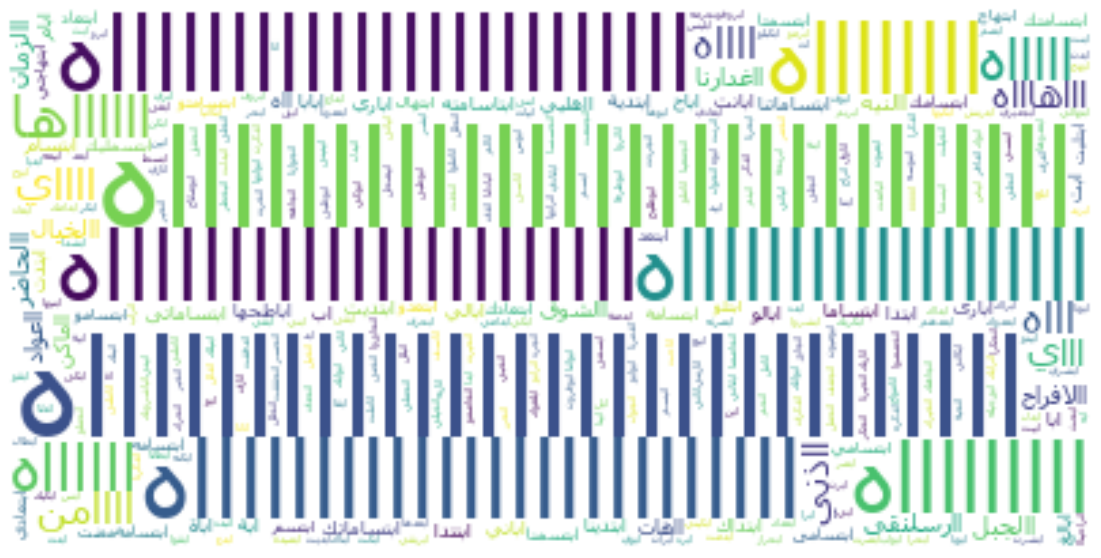

In [51]:
texts = ' '.join(word for word in sudanvocab['word'])
texts = ''.join(texts)
print ("There are {} words in the combination of all review.".format(len(set(texts))))
reshaped_text = arabic_reshaper.reshape(texts)
bidi_text = get_display(reshaped_text)
# Generate a word cloud image
wc = WordCloud(max_font_size=50, max_words=1000, stopwords=stopwords ,background_color="white",
               font_path="Tahoma Regular font.ttf")
wc.generate(bidi_text)
#Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()
wc.to_file('sudanvocab.png')

In [52]:
count_vect = CountVectorizer()

In [53]:
egyptian_vocab = count_vect.fit_transform(Lyrics_df[Lyrics_df['SongDialect']=='egyptian']['Lyrics_lemmatized'])
egyptianvocab = pd.DataFrame(count_vect.vocabulary_.items(), columns=['word','count']).sort_values(by='count', ascending = False)
egyptianvocab

,word,count
40906,ييييييييييييييييه,87213
78949,يييه,87212
67263,ييه,87211
37837,ييقى,87210
80510,ييقظ,87209
...,...,...
35387,اااااااااااااااااااااااااااااااااااااااااااااااااااااااااه,4
34973,ااااااااااااااااااااااااااااااااااااااااااااااااااااااااااااااااه,3
34978,ااااااااااااااااااااااااااااااااااااااااااااااااااااااااااااااااااه,2
36951,ااااا,1


There are 32 words in the combination of all review.


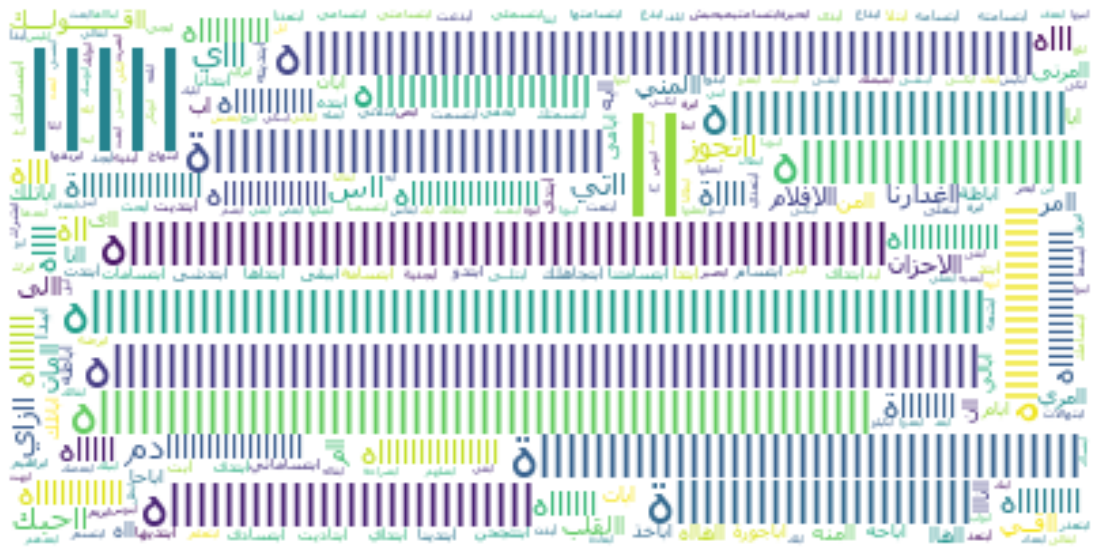

In [55]:
texts = ' '.join(word for word in egyptianvocab['word'])
texts = ''.join(texts)
print ("There are {} words in the combination of all review.".format(len(set(texts))))
reshaped_text = arabic_reshaper.reshape(texts)
bidi_text = get_display(reshaped_text)
# Generate a word cloud image
wc = WordCloud(max_font_size=50, max_words=1000, stopwords=stopwords ,background_color="white",
               font_path="Tahoma Regular font.ttf")
wc.generate(bidi_text)
#Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()
wc.to_file('egyptianvocab.png')

In [56]:
count_vect = CountVectorizer()

In [57]:
levantine_vocab = count_vect.fit_transform(Lyrics_df[Lyrics_df['SongDialect']=='levantine']['Lyrics_lemmatized'])
levantinevocab = pd.DataFrame(count_vect.vocabulary_.items(), columns=['word','count']).sort_values(by='count', ascending = False)
levantinevocab

,word,count
36944,يييييييييييييييييييييييييييييي,72931
65567,ييييييه,72930
36926,ييرجع,72929
52546,ييديه,72928
11344,ييجي,72927
...,...,...
71733,اااااااااااااااااااااه,4
15771,اااااااااااااااااااااااااااااااااااه,3
15770,ااااااااااااااااااااااااااااااااااااه,2
54396,ااااااا,1


There are 32 words in the combination of all review.


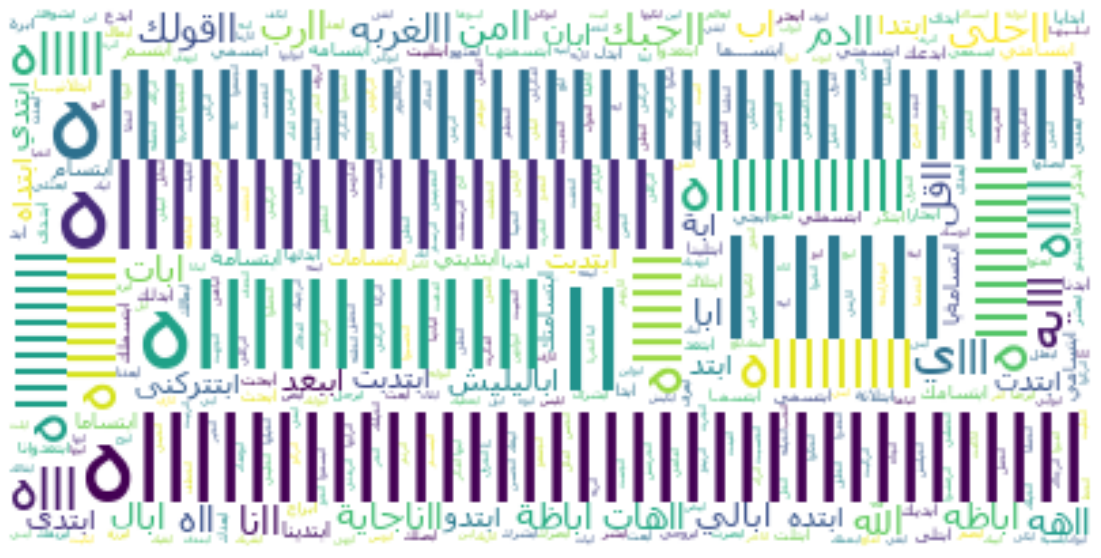

In [58]:
texts = ' '.join(word for word in levantinevocab['word'])
texts = ''.join(texts)
print ("There are {} words in the combination of all review.".format(len(set(texts))))
reshaped_text = arabic_reshaper.reshape(texts)
bidi_text = get_display(reshaped_text)
# Generate a word cloud image
wc = WordCloud(max_font_size=50, max_words=1000, stopwords=stopwords ,background_color="white",
               font_path="Tahoma Regular font.ttf")
wc.generate(bidi_text)
#Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()
wc.to_file('levantinevocab.png')